### 네이버 영화 리뷰 감성 분석

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
BASIC_PATH = "/home/ai-sjjy/workspace/juyoung/AI/project/dataset/"

In [3]:
TOTAL_RATINGS = '/rating.txt'
TRAIN_RATINGS = '/ratings_train.txt'
TEST_RATINGS = '/ratings_test.txt'

## [1] 데이터 분석

#### [1-] 파일 크기, 데이터 개수 확인

In [4]:
print("파일 크기 : ")
for file in os.listdir(BASIC_PATH):
    if 'txt' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(BASIC_PATH+"/"+file) / 100000, 2)) + 'KB')

파일 크기 : 
ratings_test.txt              48.93KB
rating.txt                    195.15KB
stop_words.txt                0.02KB
ratings_train.txt             146.29KB


In [5]:
train_data = pd.read_csv(
    BASIC_PATH + TRAIN_RATINGS, header = 0, delimiter = '\t', quoting=3
)

In [6]:
train_data.head(5)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [7]:
print("전체 학습데이터 개수 : {}".format(len(train_data)))

전체 학습데이터 개수 : 150000


In [8]:
test_data = pd.read_csv(
    BASIC_PATH + TEST_RATINGS, header = 0, delimiter = '\t', quoting=3
)

In [9]:
test_data.head(5)

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [10]:
print("전체 테스트 데이터 개수 : {}".format(len(test_data)))

전체 테스트 데이터 개수 : 50000


#### [1-2] 리뷰의 길이 확인

In [11]:
train_length = train_data['document'].astype('str').apply(len)

In [12]:
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

/home/ai-sjjy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


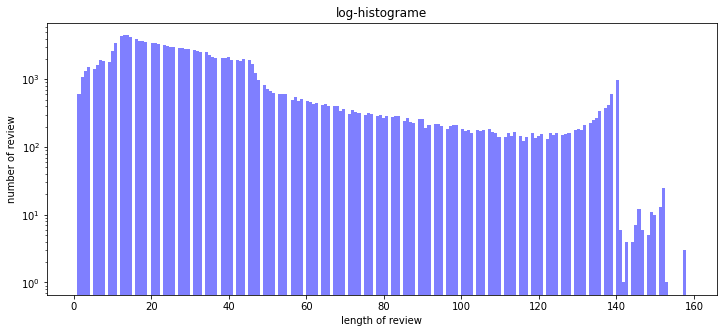

In [13]:
plt.figure(figsize=(12, 5))
plt.hist(train_length, bins=200, alpha=0.5, color='b', label='word')
plt.yscale('log', nonposy='clip')
plt.title('log-histograme')
plt.xlabel('length of review')
plt.ylabel('number of review')
plt.show()

#### [1-3] 긍정 부정 데이터 분포

/home/ai-sjjy/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

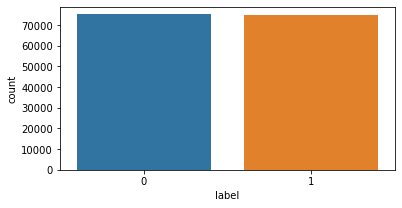

In [14]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['label'])

In [15]:
print("긍정 리뷰 개수 : {}".format(train_data['label'].value_counts()[1]))
# 긍정 : 74825
print("부정 리뷰 개수 : {}".format(train_data['label'].value_counts()[0]))
# 부정 : 75170

긍정 리뷰 개수 : 74827
부정 리뷰 개수 : 75173


#### [1-4] 각 리뷰의 단어 개수 분포

/home/ai-sjjy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


Text(0, 0.5, 'number of reviews')

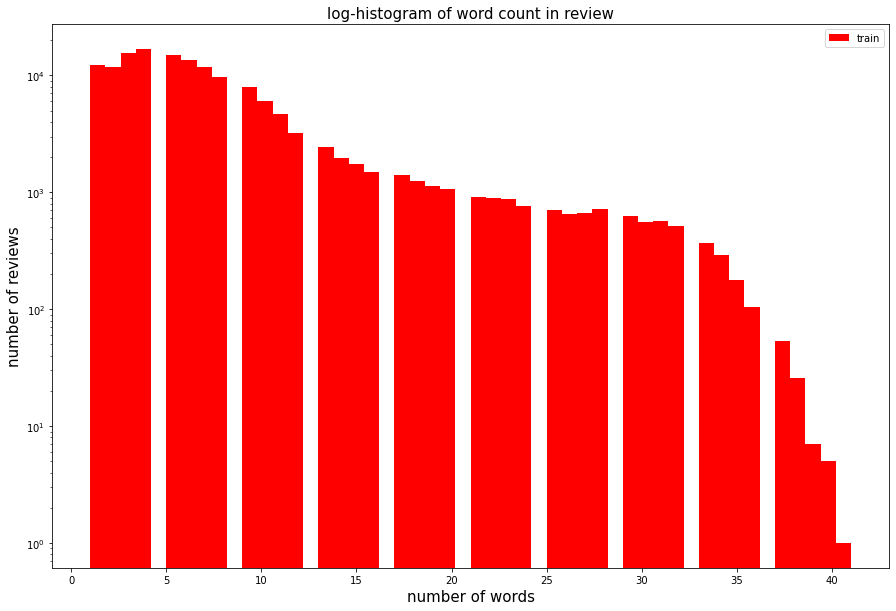

In [16]:
train_word_counts = train_data['document'].astype('str').apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('log-histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('number of words', fontsize=15)
plt.ylabel('number of reviews', fontsize=15)

#### [1-5] 특수문자

In [17]:
qmarks = np.mean(train_data['document'].astype('str').apply(lambda x: '?' in x))
fullstop = np.mean(train_data['document'].astype('str').apply(lambda x: '.' in x))
numbers = np.mean(train_data['document'].astype('str').apply(lambda x: max([y.isdigit() for y in x])))


print("물음표 있는 질문 : {:.2f}%".format(qmarks * 100))
print("마침표 있는 질문 : {:.2f}%".format(fullstop * 100))
print("숫자가 있는 질문 : {:.2f}%".format(numbers * 100))

물음표 있는 질문 : 8.25%
마침표 있는 질문 : 51.76%
숫자가 있는 질문 : 13.62%


#### [1-6] 결측치 확인

In [18]:
train_data.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [19]:
test_data.isnull().sum()

id          0
document    3
label       0
dtype: int64

In [20]:
train_data[train_data['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [21]:
test_data[test_data['document'].isnull()]

,id,document,label
5746,402110,NaN,1
7899,5026896,NaN,0
27097,511097,NaN,1


* document가 없는 데이터는 필요 없다 => drop!

In [22]:
train_data = train_data[~train_data['document'].isnull()]

In [23]:
test_data = test_data[~test_data['document'].isnull()]

In [24]:
train_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [25]:
test_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

#### [1-7] 필요없는 속성 제거
=> id 제거

In [26]:
train_data = train_data[['document', 'label']]
test_data = test_data[['document', 'label']]

## [2] 데이터 전처리

In [27]:
import numpy as np
import pandas as pd
import os
import re
import json

from konlpy.tag import Mecab

from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
from hanspell import spell_checker

mecab = Mecab() #형태소 분석기 선언


In [30]:
stop_words = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

#### [2-1] 데이터 전처리 진행

In [31]:
def preprocessing(review, spell, remove_stopwords = False, stop_words = []):    
    # 1. 한글 및 공백을 제외한 모든 문자 제거 -> 한글만 남기겠다.
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ - | \\s]", "", review)
    
    # 2. mecab 객체를 활용해 형태소 단위로 문장을 나눈다(tokenzing)
    word_review = mecab.morphs(review_text)
    
    # 3. 불용어 제거하기
    if remove_stopwords:
        word_review = [token for token in word_review if not token in stop_words]
    
    # 4. 띄어쓰기 => '너무', '재', '밓었다그래서보는것을추천한다'
    for word in word_review:
        if len(word) >= 10:
            break
    else:
        return word_review
    
    if not spell:
        result = spell_checker.check(review_text)
        result = result.as_dict()
        preprocessing(result['checked'], True, remove_stopwords = True, stop_words = stop_words)
    else:
        return word_review

In [32]:
clean_train_review = []

for review in train_data['document']:
    clean_train_review.append(preprocessing(review, False, remove_stopwords = True, stop_words = stop_words))

In [33]:
print("전체 리뷰 개수 : ", len(clean_train_review))
print("띄어쓰기 이상한 리뷰 제거한 개수 :", len([clean for clean in clean_train_review if clean]))

전체 리뷰 개수 :  149995
띄어쓰기 이상한 리뷰 제거한 개수 : 148279


In [34]:
[clean for clean in clean_train_review if not clean][:4]

[None, None, None, []]

In [35]:
for idx, clean in enumerate(clean_train_review):
    if clean == None: continue
    if clean == []:
        clean_train_review[idx] = None
    else:
        clean_train_review[idx] = " ".join(clean)

In [36]:
clean_test_review = []

for review in test_data['document']:
    clean_test_review.append(preprocessing(review, False, remove_stopwords = True, stop_words = stop_words))

In [37]:
print("전체 리뷰 개수 : ", len(clean_test_review))
print("띄어쓰기 이상한 리뷰 제거한 개수 :", len([clean for clean in clean_test_review if clean]))

전체 리뷰 개수 :  49997
띄어쓰기 이상한 리뷰 제거한 개수 : 49429


In [38]:
for idx, clean in enumerate(clean_test_review):
    if clean == None: continue
    if clean == []:
        clean_test_review[idx] = None
    else:
        clean_test_review[idx] = " ".join(clean)

#### [2-2] 띄어쓰기 이상한 리뷰 제거

In [39]:
train_data['document'] = clean_train_review

In [40]:
train_data.isnull().sum()

document    1716
label          0
dtype: int64

In [41]:
train_data = train_data[~train_data['document'].isnull()]

In [42]:
train_data.isnull().sum()

document    0
label       0
dtype: int64

In [43]:
print("전체 리뷰 개수 : ", len(train_data))

전체 리뷰 개수 :  148279


In [44]:
train_data

,document,label
0,아 더빙 진짜 짜증 나 네요 목소리,0
1,흠 포스터 보고 초딩 영화 줄 오버 연기 조차 가볍 지 않 구나,1
3,교도소 이야기 구먼 솔직히 재미 없 다 평점 조정,0
4,사이몬페그 익살 스런 연기 돋보였 던 영화 스파이더맨 에서 늙 어 보이 기 만 했 ...,1
5,막 걸음마 뗀 세 부터 초등 학교 학년 생 인 살용 영화 ㅋㅋㅋ 별반 개 아까움,0
...,...,...
149995,인간 문제지 소 뭔 죄 인가,0
149996,평점 너무 낮 아서,1
149997,이게 뭐 요 한국인 거들먹거리 고 필리핀 혼혈 착하 다,0
149998,청춘 영화 최고봉 방황 우울 했 던 날 자화상,1


In [45]:
test_data['document'] = clean_test_review

In [46]:
test_data.isnull().sum()

document    568
label         0
dtype: int64

In [47]:
test_data = test_data[~test_data['document'].isnull()]

In [48]:
test_data.isnull().sum()

document    0
label       0
dtype: int64

In [49]:
print("전체 리뷰 개수 : ", len(test_data))

전체 리뷰 개수 :  49429


In [50]:
train_data.to_csv(BASIC_PATH + 'clean_train.csv', index=False)
test_data.to_csv(BASIC_PATH + 'clean_test.csv', index=False)

### [2-2] 기본 Tokenizer

* Tokenizer 사용

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [56]:
X_train = train_data['document'].tolist()
X_train = [x.split() for x in X_train]
y_train = np.array(list(train_data['label'].tolist()))

In [57]:
X_test = test_data['document'].tolist()
X_test = [x.split() for x in X_test]
y_test = np.array(list(test_data['label'].tolist()))

In [58]:
X_train[11]

['담백',
 '하',
 '고',
 '깔끔',
 '해서',
 '좋',
 '다',
 '신문',
 '기사',
 '로',
 '만',
 '보다',
 '보',
 '면',
 '자꾸',
 '잊어버린다',
 '그',
 '사람',
 '었',
 '다는',
 '것',
 '을']

In [59]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [60]:
print(tokenizer.word_index)

{'영화': 1, '다': 2, '고': 3, '하': 4, '을': 5, '보': 6, '게': 7, '지': 8, '있': 9, '없': 10, '좋': 11, '나': 12, '었': 13, '만': 14, '는데': 15, '너무': 16, '봤': 17, '적': 18, '안': 19, '정말': 20, '로': 21, '음': 22, '것': 23, '재밌': 24, '네요': 25, '아': 26, '어': 27, '지만': 28, '같': 29, '진짜': 30, '에서': 31, '했': 32, '기': 33, '네': 34, '점': 35, '않': 36, '거': 37, '았': 38, '수': 39, '되': 40, '면': 41, 'ㅋㅋ': 42, '인': 43, '말': 44, '연기': 45, '최고': 46, '주': 47, '내': 48, '평점': 49, '이런': 50, '던': 51, '어요': 52, '할': 53, '왜': 54, '겠': 55, '스토리': 56, '습니다': 57, '해': 58, 'ㅋㅋㅋ': 59, '듯': 60, '드라마': 61, '아니': 62, '생각': 63, '그': 64, '싶': 65, '사람': 66, '감동': 67, '더': 68, '때': 69, '배우': 70, '함': 71, '본': 72, '까지': 73, '뭐': 74, '볼': 75, '알': 76, '만들': 77, '내용': 78, '보다': 79, '감독': 80, '라': 81, '재미': 82, '그냥': 83, '시간': 84, '재미있': 85, '지루': 86, '중': 87, '잼': 88, '재미없': 89, '였': 90, '년': 91, '쓰레기': 92, '사랑': 93, '못': 94, '냐': 95, '서': 96, '라고': 97, '니': 98, '면서': 99, '다시': 100, '나오': 101, '번': 102, '하나': 103, '작품': 104, '야': 105, '이거': 1

In [61]:
print("총 단어 개수 :", len(tokenizer.word_index))

총 단어 개수 : 48084


In [64]:
threshold = 2 # 빈도 수는 2번이상인 단어 기준
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 48084
등장 빈도가 1번 이하인 희귀 단어의 수: 19577
단어 집합에서 희귀 단어의 비율: 40.71416687463606
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.9769537328046262


In [65]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 28508


In [66]:
tokenizer = Tokenizer(vocab_size) # index 번호 부여가 빈도수 기반으로 했기 때문에 해당 vocab까지 자르기
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [67]:
print(X_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(X_train[0]))

[26, 477, 30, 210, 12, 25, 694]
라벨:  0
1번째 리뷰 문장 길이:  7


##### 빈 샘플 제거

In [68]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print(len(X_train))
print(len(y_train))

148178
148178


/home/ai-sjjy/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


#### [2-2-2] 임베딩 최대 길이 지정

In [69]:
total_data_text = list(X_train) + list(X_test)

# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

문장길이 평균 :  13.37973857201415
문장길이 최대 :  83
문장길이 표준편차 :  11.312676052898595


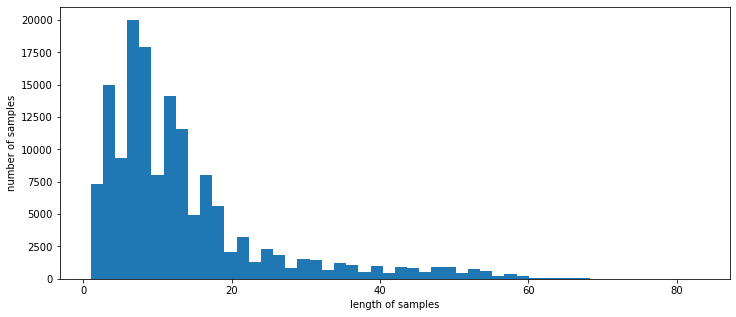

In [70]:
plt.figure(figsize=(12, 5))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [73]:
# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens) + 4
max_len = int(max_tokens)
print('pad_sequences maxlen : ', max_len)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

pad_sequences maxlen :  40
전체 문장의 0.9506394004260983%가 maxlen 설정값 이내에 포함됩니다. 


#### [2-2-3] 패딩

In [74]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [75]:
# 데이터셋 정제 후 데이터셋 shape 확인
print(X_train.shape)
print(X_test.shape)

(148178, 40)
(49429, 40)


In [76]:
data_config = {
    'max_len' : max_len,
    'vocab_size' : vocab_size
}

In [78]:
import json

json.dump(data_config, open(BASIC_PATH + 'data_configs.json', 'w'), ensure_ascii=False)

## [3] train data split 진행

In [79]:
from sklearn.model_selection import train_test_split # 데이터 셋 분할

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

In [80]:
print(X_train.shape)
print(X_val.shape)

(118542, 40)
(29636, 40)


In [81]:
X_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,  1457,
        2210, 12227,  3343,   616], dtype=int32)

## [4] 모델 설정 및 훈련

### [4-1] LSTM 모델

In [92]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.layers import Dropout, Conv1D, GlobalMaxPooling1D, Input, Flatten, Concatenate

In [87]:
lstm = Sequential()
lstm.add(Embedding(vocab_size, 100))
lstm.add(LSTM(128))
lstm.add(Dense(1, activation='sigmoid'))

In [85]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [88]:
lstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20

history = lstm.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=64, # 512, 100, 60 
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks = [es, mc])

Train on 118542 samples, validate on 29636 samples
Epoch 1/20
118542/118542 [==============================] - 64s 537us/sample - loss: 0.3769 - accuracy: 0.8317 - val_loss: 0.3347 - val_accuracy: 0.8517
Epoch 2/20
118542/118542 [==============================] - 63s 532us/sample - loss: 0.2763 - accuracy: 0.8856 - val_loss: 0.3280 - val_accuracy: 0.8558
Epoch 3/20
118542/118542 [==============================] - 62s 527us/sample - loss: 0.2201 - accuracy: 0.9112 - val_loss: 0.3457 - val_accuracy: 0.8560
Epoch 4/20
118542/118542 [==============================] - 63s 533us/sample - loss: 0.1747 - accuracy: 0.9322 - val_loss: 0.3930 - val_accuracy: 0.8535
Epoch 5/20
118542/118542 [==============================] - 63s 531us/sample - loss: 0.1378 - accuracy: 0.9472 - val_loss: 0.4601 - val_accuracy: 0.8505
Epoch 6/20
118542/118542 [==============================] - 64s 537us/sample - loss: 0.1092 - accuracy: 0.9591 - val_loss: 0.5637 - val_accuracy: 0.8476
Epoch 00006: early stopping


In [89]:
results = lstm.evaluate(X_test, y_test, verbose=2)

print(results)

49429/49429 - 7s - loss: 0.5742 - accuracy: 0.8440
[0.5742166582036369, 0.8440389]


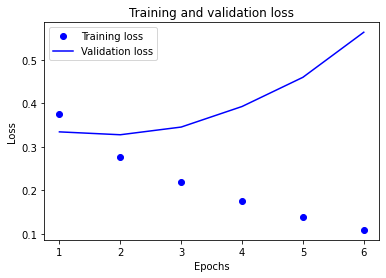

In [90]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### [4-2] CNN 모델

In [93]:
embedding_dim = 128
dropout_prob = (0.5, 0.8)
num_filters = 128

model_input = Input(shape = (max_len,))
z = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_prob[0])(z)

In [94]:
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv = Flatten()(conv)
    conv_blocks.append(conv)


In [95]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_prob[1])(z)
z = Dense(128, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

In [97]:
cnn = Model(model_input, model_output)
cnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

history = cnn.fit(X_train, y_train, batch_size = 64, \
          epochs=10, validation_data = (X_val, y_val), verbose=1, callbacks=[es, mc])

Train on 118542 samples, validate on 29636 samples
Epoch 1/10
118464/118542 [============================>.] - ETA: 0s - loss: 0.3602 - acc: 0.8447
Epoch 00001: val_acc improved from -inf to 0.84829, saving model to best_model.h5
118542/118542 [==============================] - 53s 447us/sample - loss: 0.3601 - acc: 0.8447 - val_loss: 0.3490 - val_acc: 0.8483
Epoch 2/10
118464/118542 [============================>.] - ETA: 0s - loss: 0.3193 - acc: 0.8662
Epoch 00002: val_acc improved from 0.84829 to 0.85285, saving model to best_model.h5
118542/118542 [==============================] - 53s 444us/sample - loss: 0.3193 - acc: 0.8661 - val_loss: 0.3419 - val_acc: 0.8528
Epoch 3/10
118464/118542 [============================>.] - ETA: 0s - loss: 0.2880 - acc: 0.8822
Epoch 00003: val_acc did not improve from 0.85285
118542/118542 [==============================] - 53s 444us/sample - loss: 0.2880 - acc: 0.8822 - val_loss: 0.3426 - val_acc: 0.8519
Epoch 4/10
118464/118542 [===================

In [107]:
results = cnn.evaluate(X_test, y_test, verbose=2)

print(results)

49429/49429 - 3s - loss: 0.3699 - acc: 0.8476
[0.3699463469786942, 0.84761983]


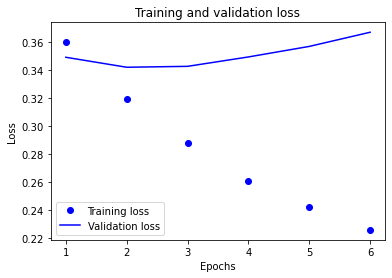

In [110]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### [4-3] CNN-LSTM 모델

## [5] 리뷰 예측

In [105]:
def sentiment_predict(new_sentence):
    new_sentence = mecab.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stop_words] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(lstm.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [106]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

95.63% 확률로 긍정 리뷰입니다.

